# Spectrum 
[audio-deep-learning-made-simple-part-2]([audio-deep-learning-made-simple-part-2](https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505))

In [1]:
%load_ext autoreload
%autoreload 2

In [71]:
import librosa
import numpy as np
import matplotlib.pylab as plt
from pydub import AudioSegment, silence
import gridfs

from pydub.playback import play

%matplotlib inline

In [3]:
import src.utils

In [4]:
df = src.utils.generate_df()
df.head()

,key,name,sci_name,id,data-xc-filepath,data-xc-id,page,length,contributor,date,...,country,location,elev,type,note,bird_seen,playback_used,class,row,size
0,1259,Golden-billed Saltator,Saltator-aurantiirostris,xc_audio_697285_194,//xeno-canto.org/sounds/uploaded/VLDFGFKOWN/XC...,697285,48,1:50,Franco Vushurovich,2021-10-09,...,Argentina,"Mina Clavero, Córdoba",1000,song,Quebrada la Gloria,no,no,A,4.0,2659330
1,1260,Chiguanco Thrush,Turdus-chiguanco,xc_audio_697254_195,//xeno-canto.org/sounds/uploaded/VLDFGFKOWN/XC...,697254,48,0:11,Franco Vushurovich,2021-10-09,...,Argentina,"Mina Clavero, Córdoba",1000,"begging call, contact call?",Quebrada la Gloria,no,no,A,5.0,270573
2,1261,Chiguanco Thrush,Turdus-chiguanco,xc_audio_697249_196,//xeno-canto.org/sounds/uploaded/VLDFGFKOWN/XC...,697249,48,0:36,Franco Vushurovich,2021-10-09,...,Argentina,"Mina Clavero, Córdoba",1000,"alarm call, call, flight call",Varios individuos sobrevolando dentro de la Qu...,yes,no,A,6.0,884428
3,1264,Golden-billed Saltator,Saltator-aurantiirostris,xc_audio_696093_199,//xeno-canto.org/sounds/uploaded/VLDFGFKOWN/XC...,696093,48,0:48,Franco Vushurovich,2021-10-10,...,Argentina,"Mina Clavero, Córdoba",900,song,Campo la Gloria al oeste (W) de Mina Clavero,no,no,A,9.0,1169028
4,1265,Rufous-bellied Thrush,Turdus-rufiventris,xc_audio_695280_200,//xeno-canto.org/sounds/uploaded/XTVEPHMPPJ/XC...,695280,48,4:34,Niels Krabbe,2022-01-03,...,Argentina,Salta: La Misión,1270,song,bird-seen:no,no,no,A,10.0,4401294


In [5]:
db = src.utils.get_mongo_access()

In [6]:
src.utils.get_mp3_fname(3)

'./data/sound_db/sound_3.mp3'

In [83]:
song = AudioSegment.from_mp3(src.utils.get_mp3_fname(3))
# play(song)

In [73]:
song

In [84]:
silence.detect_silence(song)

[[0, 27089]]

In [ ]:
dir(song)

In [69]:
song.get_dc_offset()

-3.0517578125e-05

In [ ]:
ri = 1511
song = AudioSegment.from_mp3(src.utils.get_mp3_fname(ri))
if silence.split_on_silence(song):
        print(silence.split_on_silence(song))

In [86]:
for ri , row in df.iterrows():
    song = AudioSegment.from_mp3(src.utils.get_mp3_fname(row['key']))
    if song.channels == 2:
        song = song.set_channels(1)
    elif song.channels >2:
        print(f'in row {ri} more than two channels {song.channels}')
    else:
        pass

    commponents = silence.split_on_silence(song)
    if commponents:
        result = commponents[0]
        for i in range(1, len(commponents)):
            result.append(commponents[i], crossfade=0)

    seg = np.fft.fft(np.array(song.get_array_of_samples()))
    fig ,ax = plt.subplots(1)
    ax.specgram(seg, NFFT=1024, Fs=song.frame_rate, noverlap=900)
    # ax.set_xlabel('Time')
    # ax.set_ylabel('Frequency')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.savefig(f"./data/spectrum_{row['key']}.png")



key                                                              1278
name                                            Rufous-bellied Thrush
sci_name                                           Turdus-rufiventris
id                                                xc_audio_692377_218
data-xc-filepath    //xeno-canto.org/sounds/uploaded/XTVEPHMPPJ/XC...
data-xc-id                                                     692377
page                                                               48
length                                                           1:38
contributor                                              Niels Krabbe
date                                                       2021-12-21
time                                                            06:06
country                                                     Argentina
location                               Salta: Vaqueros, 12 km N Salta
elev                                                             1270
type                

KeyboardInterrupt: 

In [77]:
np.array(song.get_array_of_samples()).shape

(1194624,)

In [63]:
seg = np.fft.fft(np.array(song.get_array_of_samples()))
seg.shape, seg

((1194624,),
 array([-793879.            +0.j        ,  249634.00870782 -1078.15987194j,
         174286.23705362+23692.38332479j, ...,
         245472.95654881 +3606.20937884j,  174286.23705362-23692.38332479j,
         249634.00870782 +1078.15987194j]))

In [64]:
seg[np.abs(seg)<10.1]

array([-9.14170554-0.6753355j , -4.51955708+7.11193507j,
       -4.98529474+0.41187588j,  0.85409671+9.91642658j,
        8.97879942-3.0832914j ,  5.7641218 +2.19403504j,
        6.31174672-3.87351913j,  6.52887887+7.2731691j ,
       -2.93158379-1.08640338j,  9.01602657+1.97225904j,
        7.2105585 +4.81741734j, -2.67918287-1.14839594j,
       -3.95202472-6.13943299j, -5.03698136+7.53825658j,
       -2.8303456 +7.83667241j, -0.9126182 -2.14468993j,
        2.35002547-7.70997826j, -3.09783401-7.3144298j ,
       -4.4058888 -2.30930173j, -1.9024249 +4.07144356j,
        3.83844124+3.46076852j, -0.34854837-8.66469507j,
        2.27624278+3.65154199j,  3.96433499+6.18625282j,
        2.66863574-5.37379268j,  3.40603103+2.53922485j,
        7.88079816+2.93747246j, -8.76170098+3.9134814j ,
       -2.34709319-9.21594027j, -4.02221132+4.35556158j,
       -7.46038919-6.73135802j,  3.32083081-3.25757924j,
       -0.10108192+4.48944227j, -2.89764463-0.94769494j,
       -0.83870407-5.30520482j,

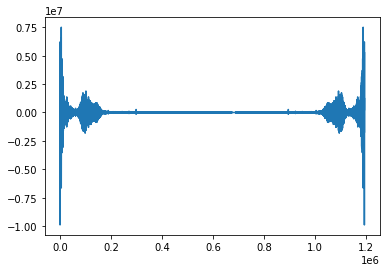

In [65]:
plt.plot(np.real(seg))

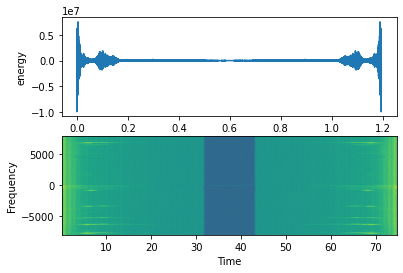

In [66]:
sample_rate = 16000
plt.figure(1)

plot_a = plt.subplot(211)
plot_a.plot(seg)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

plot_b = plt.subplot(212)
plot_b.specgram(seg, NFFT=1024, Fs=sample_rate, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.savefig('./data/sound_3.png')
plt.show()